In [28]:
# http://www.kdd.org/exploration_files/KDDCUP2005Report_Shen.pdf
# http://research.microsoft.com/pubs/81350/sigir09.pdf
# http://research.microsoft.com/pubs/79487/Query%20Enrichment%20for%20Web-query%20Classification.Shen.HKUST.TOIS.2006.Paper.pdf
%matplotlib inline

import pandas as pd
import numpy as np

import glob
import re

import matplotlib.pyplot as plt

In [3]:
###########################################
# create a function to combine data files #
###########################################

def frame_masher():
    # find all of the query files
    numbers = [1,4,5,6,7,11,12,15] # combine these datafiles
    query_files = []
    for num in numbers:
        file ='data/tea_party/tea_party{}.csv'.format(num)
        query_files.append(file)
    
    
    # empty list to add data frames to
    frame_list = []
    
    # iterate through the files to create one combined date frame
    for frame in query_files:
        df = pd.read_csv(frame)
        frame_list.append(df)
    joined = pd.concat(frame_list).reset_index()
    final = joined.drop('index',axis = 1)
    return final

In [4]:
# create the combined data frame
df = frame_masher()

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (8,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,3,4,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,1,2,3,4,5,6,9,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (3,4,5,6,9,11,12,14) have mixed types. Speci

In [18]:
# little bit of clean up

df = df.loc[df['job_id'] == '2572']

In [19]:
df

,job_id,created_at,text,from_user,from_user_id_str,from_user_name,from_user_fullname,from_user_followers,from_user_following,from_user_favorites,from_user_tweets,from_user_timezone,to_user,to_user_id_str,to_user_name
0,2572,2014-08-05 13:30:16,"Don't tread on me... It seems that the ""left w...",15787028,15787028,rfueyo,Rick Fueyo,70.0,117,98,710.0,Quito,NaN,NaN,NaN
1,2572,2014-08-05 13:30:19,RT @mjselker: Fmr RNC Chair Haley Barbour and ...,2601838376,2601838376,siewlee1804,Read Man Mind,98.0,120,66,3913.0,NaN,NaN,NaN,NaN
2,2572,2014-08-05 13:30:20,Tea Party fanfic -&gt; RT @ericdondero It's ge...,19148225,19148225,LoganJames,Logan Smith,5175.0,2340,2732,23458.0,Eastern Time (US & Canada),1.91482e+07,1.914822e+07,LoganJames
3,2572,2014-08-05 13:30:23,What did they do at the Boston Tea Party? I do...,2609079098,2609079098,reca712,????? ???????,15.0,20,0,38.0,NaN,NaN,NaN,NaN
4,2572,2014-08-05 13:30:33,RT @FigDrewton: We have to be careful not to o...,50427352,50427352,seanagnew,Sean Agnew,5533.0,1482,321,74435.0,Eastern Time (US & Canada),NaN,NaN,NaN
5,2572,2014-08-05 13:30:33,"RT @RBPundit: I, for one, make a distinction b...",23718424,23718424,JesseInOH,Jesse Hathaway,1332.0,460,909,21894.0,Eastern Time (US & Canada),NaN,NaN,NaN
6,2572,2014-08-05 13:30:38,RT @FigDrewton: We have to be careful not to o...,16257649,16257649,jacobperry,Jacob Perry,2307.0,1695,9262,50459.0,Eastern Time (US & Canada),NaN,NaN,NaN
7,2572,2014-08-05 13:30:42,"RT @michelelfrost: Unfortunately ""support the ...",23113181,23113181,conkc2,Kimberly C,4003.0,4405,11567,55017.0,Eastern Time (US & Canada),NaN,NaN,NaN
8,2572,2014-08-05 13:30:47,RT @FirstTeamTommy: These dirtbags right here ...,492715225,492715225,Bertholomew1,Bertholomew,142.0,512,33,14357.0,Atlantic Time (Canada),NaN,NaN,NaN
9,2572,2014-08-05 13:31:01,"RT @CombatCavScout: Oh, hey, that's cool, I gu...",476118363,476118363,MnkyMnd,MnkyMnd,271.0,284,7,1984.0,NaN,NaN,NaN,NaN


In [20]:
# change the `changed_at` column to a datetime type

df['created_at']=pd.to_datetime(df['created_at'],format='%Y-%m-%d %H:%M:%S')

In [21]:
# find the earliest and latest tweets in the set

early = df['created_at'].min()
recent = df['created_at'].max()
print("the earliest tweet of this set is {} and the most recent is {}.".format(early,recent))

the earliest tweet of this set is 2014-08-05 13:30:16 and the most recent is 2016-04-21 21:35:44.


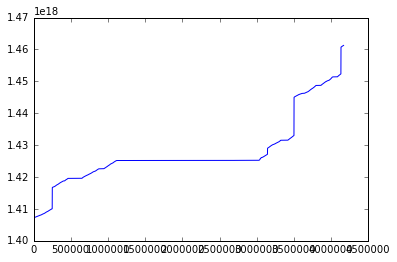

In [30]:
# convert the date column into something matplotlib can read and then plot it. 
df['date_int'] = df.created_at.astype(np.int64)
plt.plot(df['date_int'])

In [32]:
df

,job_id,created_at,text,from_user,from_user_id_str,from_user_name,from_user_fullname,from_user_followers,from_user_following,from_user_favorites,from_user_tweets,from_user_timezone,to_user,to_user_id_str,to_user_name,date_int
0,2572,2014-08-05 13:30:16,"Don't tread on me... It seems that the ""left w...",15787028,15787028,rfueyo,Rick Fueyo,70.0,117,98,710.0,Quito,NaN,NaN,NaN,1407245416000000000
1,2572,2014-08-05 13:30:19,RT @mjselker: Fmr RNC Chair Haley Barbour and ...,2601838376,2601838376,siewlee1804,Read Man Mind,98.0,120,66,3913.0,NaN,NaN,NaN,NaN,1407245419000000000
2,2572,2014-08-05 13:30:20,Tea Party fanfic -&gt; RT @ericdondero It's ge...,19148225,19148225,LoganJames,Logan Smith,5175.0,2340,2732,23458.0,Eastern Time (US & Canada),1.91482e+07,1.914822e+07,LoganJames,1407245420000000000
3,2572,2014-08-05 13:30:23,What did they do at the Boston Tea Party? I do...,2609079098,2609079098,reca712,????? ???????,15.0,20,0,38.0,NaN,NaN,NaN,NaN,1407245423000000000
4,2572,2014-08-05 13:30:33,RT @FigDrewton: We have to be careful not to o...,50427352,50427352,seanagnew,Sean Agnew,5533.0,1482,321,74435.0,Eastern Time (US & Canada),NaN,NaN,NaN,1407245433000000000
5,2572,2014-08-05 13:30:33,"RT @RBPundit: I, for one, make a distinction b...",23718424,23718424,JesseInOH,Jesse Hathaway,1332.0,460,909,21894.0,Eastern Time (US & Canada),NaN,NaN,NaN,1407245433000000000
6,2572,2014-08-05 13:30:38,RT @FigDrewton: We have to be careful not to o...,16257649,16257649,jacobperry,Jacob Perry,2307.0,1695,9262,50459.0,Eastern Time (US & Canada),NaN,NaN,NaN,1407245438000000000
7,2572,2014-08-05 13:30:42,"RT @michelelfrost: Unfortunately ""support the ...",23113181,23113181,conkc2,Kimberly C,4003.0,4405,11567,55017.0,Eastern Time (US & Canada),NaN,NaN,NaN,1407245442000000000
8,2572,2014-08-05 13:30:47,RT @FirstTeamTommy: These dirtbags right here ...,492715225,492715225,Bertholomew1,Bertholomew,142.0,512,33,14357.0,Atlantic Time (Canada),NaN,NaN,NaN,1407245447000000000
9,2572,2014-08-05 13:31:01,"RT @CombatCavScout: Oh, hey, that's cool, I gu...",476118363,476118363,MnkyMnd,MnkyMnd,271.0,284,7,1984.0,NaN,NaN,NaN,NaN,1407245461000000000
